In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import r2_score
import math

In [64]:
data = pd.read_csv('DATA/B-train.csv')
data

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,58.76,123.79,-3.12,-13.11,4.03,224.40,-248.42,7.18,6.73
1,120.85,163.83,14.75,-2.12,8.61,28.05,-73.58,670.29,7.28
2,-19.30,39.05,0.55,1.34,-1.70,-2.19,308.07,3567.67,5.22
3,-65.72,-36.37,10.76,-8.88,15.04,-5.70,14.60,1054.30,6.66
4,11.00,-64.78,-3.23,7.37,25.74,20.48,91.13,102.21,-0.25
...,...,...,...,...,...,...,...,...,...
185,NaN,8.79,-10.48,NaN,12.52,-10.13,NaN,1174.43,3.69
186,-30.81,48.65,NaN,2.58,8.72,6.97,-69.11,1583.24,5.99
187,NaN,50.33,3.13,13.03,NaN,4.53,-173.70,254.72,-6.73
188,101.46,-67.42,0.44,-3.74,8.93,-4.29,21.79,40925.29,-13.39


In [65]:
imputer = KNNImputer(n_neighbors=11, weights="uniform")
imputer.fit_transform(data)
data[:] = imputer.transform(data)

In [66]:
data[:]

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,58.760000,123.79,-3.120000,-13.110000,4.030000,224.40,-248.420000,7.18,6.73
1,120.850000,163.83,14.750000,-2.120000,8.610000,28.05,-73.580000,670.29,7.28
2,-19.300000,39.05,0.550000,1.340000,-1.700000,-2.19,308.070000,3567.67,5.22
3,-65.720000,-36.37,10.760000,-8.880000,15.040000,-5.70,14.600000,1054.30,6.66
4,11.000000,-64.78,-3.230000,7.370000,25.740000,20.48,91.130000,102.21,-0.25
...,...,...,...,...,...,...,...,...,...
185,-39.654545,8.79,-10.480000,-4.306364,12.520000,-10.13,-144.576364,1174.43,3.69
186,-30.810000,48.65,-6.705455,2.580000,8.720000,6.97,-69.110000,1583.24,5.99
187,-276.809091,50.33,3.130000,13.030000,17.431818,4.53,-173.700000,254.72,-6.73
188,101.460000,-67.42,0.440000,-3.740000,8.930000,-4.29,21.790000,40925.29,-13.39


In [67]:
column = ['x1','x2','x3','x4','x5','x6','x7','x8']
for i in column:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    for j in range(len(data)):
        if(data[i][j] < lower_bound ):
            data[i][j] = np.nan
        elif(data[i][j] > upper_bound ):
            data[i][j] = np.nan
        inplace=True

In [68]:
column = ['x1','x2','x3','x4','x5','x6','x7','x8','y']
for i in column:
    data.dropna(subset=[i],inplace=True)
data

,x1,x2,x3,x4,x5,x6,x7,x8,y
1,120.850000,163.83,14.750000,-2.120000,8.61,28.05,-73.580000,670.29,7.28
3,-65.720000,-36.37,10.760000,-8.880000,15.04,-5.70,14.600000,1054.30,6.66
4,11.000000,-64.78,-3.230000,7.370000,25.74,20.48,91.130000,102.21,-0.25
7,19.840000,12.91,15.040000,2.110000,-10.95,-0.82,-11.300000,10.82,2.19
8,-21.320000,2.66,4.680000,-5.560000,24.72,4.04,9.960000,751.86,6.25
...,...,...,...,...,...,...,...,...,...
183,66.130000,-89.43,-6.600000,-24.020000,6.37,7.25,152.910000,23244.05,-10.23
184,-92.820000,-255.01,-5.040000,-14.900000,-1.36,6.96,-8.490000,4557.60,-7.81
185,-39.654545,8.79,-10.480000,-4.306364,12.52,-10.13,-144.576364,1174.43,3.69
186,-30.810000,48.65,-6.705455,2.580000,8.72,6.97,-69.110000,1583.24,5.99


In [69]:
X = data[["x1","x2","x3","x4","x5","x6","x7","x8"]]
Y = data[["y"]]

<AxesSubplot:>

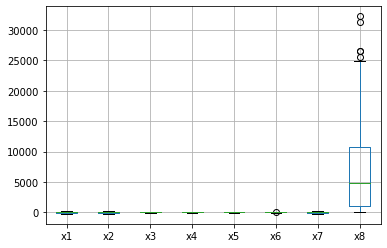

In [70]:
X.boxplot()

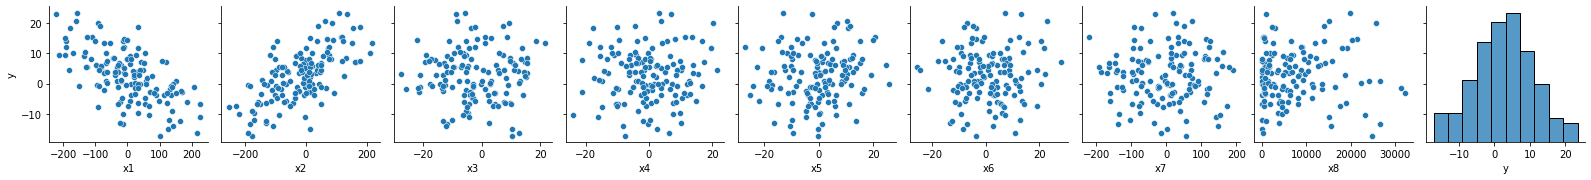

In [71]:
sns.pairplot(data, x_vars=data.columns, y_vars=["y"])

<AxesSubplot:>

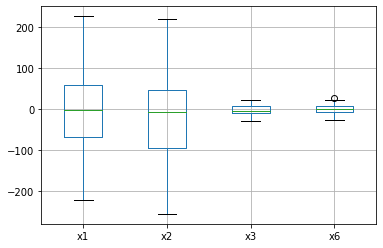

In [72]:
X = data[["x1","x2","x3","x6"]]
Y = data[["y"]]
X.boxplot()

In [73]:
list = []
for i in range(500):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    y_pred = lm.predict(X_test)
    m = lm.coef_
    c = lm.intercept_
    MSE = np.square(np.subtract(y_test,y_pred)).mean()
    RMSE = math.sqrt(MSE)
    list.append(RMSE)

In [74]:
average = sum(list) / len(list)
print("AVERAGE 500 RMSE =" ,average)

AVERAGE 500 RMSE = 4.017988289385648
